Solucion: [2.4326060026889656e-23, 1.6397443804071464e-23] 8.606333597395204e-46


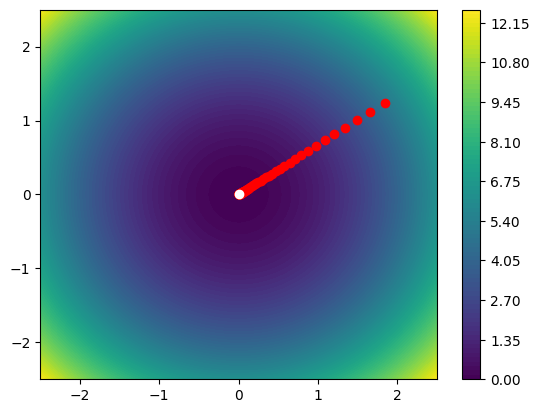

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f = lambda x: x[0]**2 + x[1]**2
df = lambda x: [2*x[0], 2*x[1]]

# preparación datos para dibujar mapa de niveles de Z
res = 100
rango = 2.5
X = np.linspace( -rango, rango, res)
Y = np.linspace( -rango, rango, res)
Z = np.zeros((res, res))
for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x,y])

# dibujar el mapa de niveles de Z
plt.contourf(X, Y, Z, res)
plt.colorbar()

P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c='red')

lr = 0.05
for _ in range(500):
  grad = df(P)
  P[0], P[1] = P[0] - lr*grad[0], P[1] - lr*grad[1]
  plt.plot(P[0], P[1], 'o', c='red')

plt.plot(P[0], P[1], 'o', c='white')
print('Solucion:', P, f(P))

Iteracion 0 >> Solucion: [-0.6619837079678664, 0.7010477914971871], -0.031526404354647375 || LR: 0.09474631620823565
Iteracion 100 >> Solucion: [0.2017617525224442, 1.5563170435516755], -0.6517094157205245 || LR: 0.010868491177102521
Iteracion 200 >> Solucion: [0.2547230189536491, 1.5755476575833234], -0.6556214351664493 || LR: 0.007129636904892365
Iteracion 300 >> Solucion: [0.27222616896540097, 1.581893661617104], -0.6564193171395803 || LR: 0.005890916580808746
Iteracion 400 >> Solucion: [0.2802461029860515, 1.5847987744871324], -0.6567032817471059 || LR: 0.005322853021786778
Iteracion 500 >> Solucion: [0.28445272777361813, 1.586321818793444], -0.6568317543572655 || LR: 0.0050247726821614925
Iteracion 600 >> Solucion: [0.28681529276734574, 1.5871769668250355], -0.6568977352135089 || LR: 0.004857326347790567
Iteracion 700 >> Solucion: [0.2881932186147514, 1.587675635817542], -0.6569341681384446 || LR: 0.004759654357493769
La distancia entre puntos es menor que la tolerancia en la iter

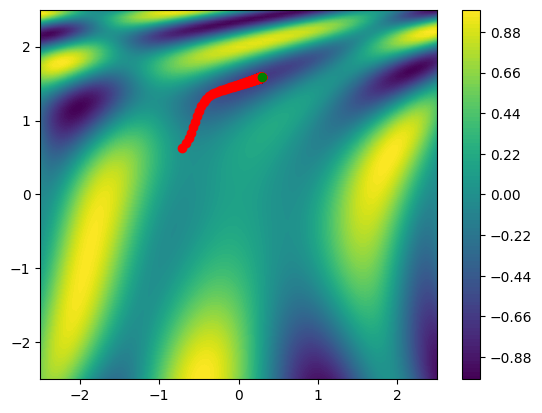

In [77]:
def df(x):
  h = 0.01
  T = np.copy(x)
  grad = np.zeros(2)
  for it, th in enumerate(x):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(x)) / h

  return grad

f = lambda x: np.sin(1/2 * x[0]**2 - 1/4 * x[1]**2 + 3) * np.cos(2 * x[0] + 1 - np.e**x[1])

res = 100
rango = 2.5
X = np.linspace( -rango, rango, res)
Y = np.linspace( -rango, rango, res)
Z = np.zeros((res, res))
for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x,y])

# dibujar el mapa de niveles de Z
plt.contourf(X, Y, Z, res)
plt.colorbar()

P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c='red')

# Preparación de ADAM
lr = 0.1
m = 0  # Primer momento ADAM
v = 0  # Segudno momento ADAM
iterations = 10000
previous_point = (0,0)
tol = 0.00001

for i in range(iterations):
  grad = df(P)
  P[0], P[1] = P[0] - lr*grad[0], P[1] - lr*grad[1]

  # Se evalua la distancia entre el punto actual y el anterior para ver si
  # la distancia entre ellos es menor a un valor de toleracia, lo cual querría
  # decir que estamos en un mínimo.
  distance = np.sqrt((P[0] - previous_point[0])**2 + (P[1] - previous_point[1])**2)

  if distance < tol:
    print(f'La distancia entre puntos es menor que la tolerancia en la iteración {i}')
    break

  # Si el nuevo P esta fuera de rango se para el proceso. También podría
  # reasignarse el punto y así probar otras regiones de la función.
  if P[0] > rango or P[0] < - rango:
    # P[0] = random.uniform(-rango, rango)
    print('Valor fuera de rango.')
    break
  elif P[1] > rango or P[1] < - rango:
    # P[1] = random.uniform(-rango, rango)
    print('Valor fuera de rango.')
    break

  # Se ajusta el LR
  # lr = lr_drop(lr, 0.5, i, 200)
  # lr = lr_decay(lr, 0.0001, i)
  # lr = exp_decay(lr, 0.0001, i)
  lr = adjust_lr(lr, grad) # se ajusta el lr dependiendo del gradiente

  if (i % 100) == 0:
    print(f'Iteracion {i} >> Solucion: {P}, {f(P)} || LR: {lr}')
  plt.plot(P[0], P[1], 'o', c='red')

  previous_point = P.copy()

plt.plot(P[0], P[1], 'o', c='green')
print('Solucion:', P, f(P))

In [45]:
import numpy as np
def lr_drop(lr_actual, drop, iteracion_actual, n_iteraciones):
  ''' Reducción de la tasa de aprendizaje cada cierto número de iteraciones en base
  a una tasa de disminución. '''
  return lr_actual * math.pow(drop, math.floor((1+iteracion_actual)/n_iteraciones))


def lr_decay(lr, decay, iteracion):
  ''' Reducción del lr por una tasa fija en cada iteración'''
  return lr * 1/(1 + decay * iteracion)


def exp_decay(lr, k, iteration):
  return lr * np.exp(-k * iteration)


def adjust_lr(lr, grad):
    min_lr = 0.001
    max_grad_magnitude = 15

    grad_magnitude = np.sqrt(grad[0] ** 2 + grad[1] ** 2)
    adjusted_lr = lr / (1 + grad_magnitude / max_grad_magnitude)
    adjusted_lr = max(adjusted_lr, min_lr)

    return adjusted_lr
